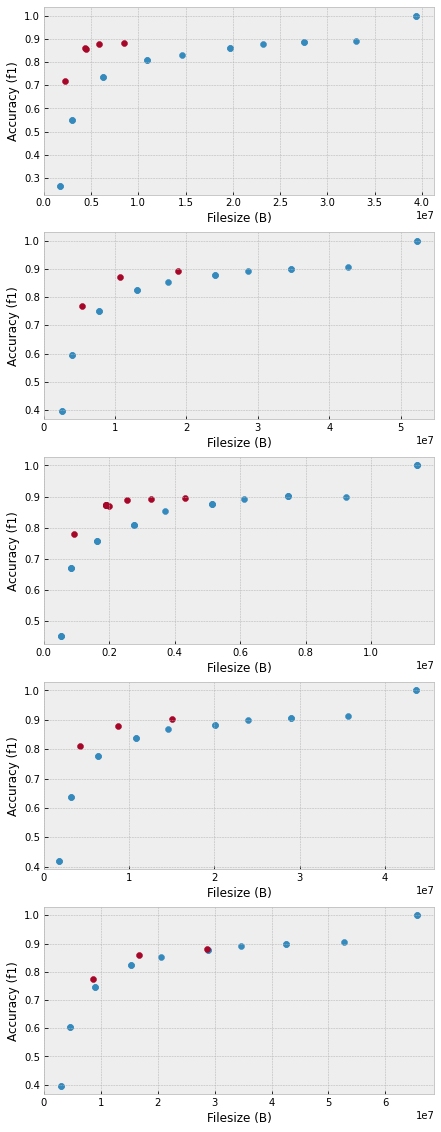

In [70]:

import matplotlib.pyplot as plt
import yaml
with open('stats', 'r') as f:
    data_full = yaml.load(f.read())

#plt.figure(figsize=(7, 5))
plt.style.use('bmh')

# video_names = ['dashcam_%d_' % (i) for i in [2,5,6,8]] #+ ['visdrone/videos/vis_171']

video_names = ['visdrone/videos/vis_%d' % i for i in [169, 170, 171, 172, 173]]
# video_names = [
#         "visdrone/videos/vis_171",
#         "visdrone/videos/vis_170",
#         "visdrone/videos/vis_173",
#         "visdrone/videos/vis_169",
#         "visdrone/videos/vis_172",
#     ]

fig, ax = plt.subplots(len(video_names), figsize=(7, 20))

for i, video_name in enumerate(video_names):
    data = [i for i in data_full if video_name in i['video_name']]
    data = [i for i in data if 'ground_truth' not in i['ground_truth_name']]
    metric = 'f1'

    # print(data[-1])
    
    ax[i].scatter([i['bw'] for i in data if 'black' not  in i['video_name']], [i[metric] for i in data if 'black' not in i['video_name']])

    kws = ['gt']
    data_ = [i for i in data if all(kw in i['video_name'] for kw in kws)]
    data_ = sorted(data_, key=lambda x: -x['f1'])
    # print(data_[0])
    # data_ = data_[-2:]
    ax[i].scatter([i['bw'] for i in data_], [i[metric] for i in data_])

    # kws = ['dds']
    # data_ = [i for i in data if all(kw in i['video_name'] for kw in kws)]
    # data_ = sorted(data_, key=lambda x: -x[metric])
    # # print(data_[0])
    # # data_ = data_[-2:]
    # ax[i].scatter([i['bw'] for i in data_], [i[metric] for i in data_])


    # kws = ['final_single', 'bound_0.3', 'conv_9']
    # data_ = [i for i in data if all(kw in i['video_name'] for kw in kws)]
    # data_ = sorted(data_, key=lambda x: -x[metric])
    # # print(data_[0])
    # # data_ = data_[-2:]
    # ax[i].scatter([i['bw'] for i in data_], [i[metric] for i in data_])

    # if i == 1:
    #     print(data_)

    ax[i].set_xlim(left=0)
    ax[i].set_ylabel('Accuracy (%s)' % metric)
    ax[i].set_xlabel('Filesize (B)')

# fig.savefig('dashcam.png')


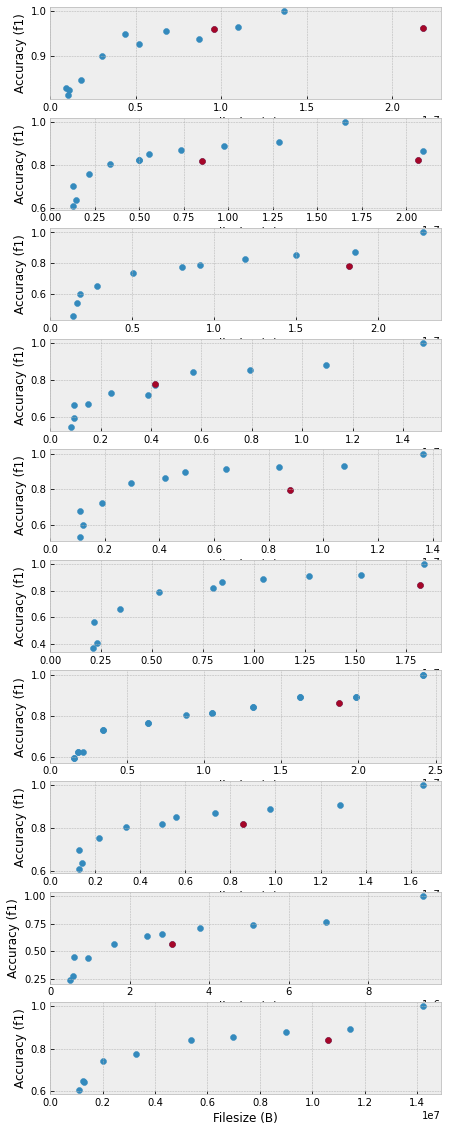

In [69]:

import matplotlib.pyplot as plt
import yaml
with open('stats_detection', 'r') as f:
    data_full = yaml.load(f.read())

#plt.figure(figsize=(7, 5))
plt.style.use('bmh')

# video_names = ['dashcam_%d_' % (i) for i in [2,5,6,8]] #+ ['visdrone/videos/vis_171']

video_names = ['dashcam/dashcam_%d_' % i for i in range(1,11)]
# video_names = [
#         "visdrone/videos/vis_171",
#         "visdrone/videos/vis_170",
#         "visdrone/videos/vis_173",
#         "visdrone/videos/vis_169",
#         "visdrone/videos/vis_172",
#     ]

fig, ax = plt.subplots(len(video_names), figsize=(7, 20))

for i, video_name in enumerate(video_names):
    data = [i for i in data_full if video_name in i['video_name']]
    data = [i for i in data if 'ground_truth' not in i['ground_truth_name']]
    metric = 'f1'

    # print(data[-1])
    
    ax[i].scatter([i['bw'] for i in data if 'black' not  in i['video_name']], [i[metric] for i in data if 'black' not in i['video_name']])

    kws = ['reduc']
    data_ = [i for i in data if all(kw in i['video_name'] for kw in kws)]
    data_ = sorted(data_, key=lambda x: -x['f1'])
    # print(data_[0])
    # data_ = data_[-2:]
    ax[i].scatter([i['bw'] for i in data_], [i[metric] for i in data_])

    # kws = ['dds']
    # data_ = [i for i in data if all(kw in i['video_name'] for kw in kws)]
    # data_ = sorted(data_, key=lambda x: -x[metric])
    # # print(data_[0])
    # # data_ = data_[-2:]
    # ax[i].scatter([i['bw'] for i in data_], [i[metric] for i in data_])


    # kws = ['final_single', 'bound_0.3', 'conv_9']
    # data_ = [i for i in data if all(kw in i['video_name'] for kw in kws)]
    # data_ = sorted(data_, key=lambda x: -x[metric])
    # # print(data_[0])
    # # data_ = data_[-2:]
    # ax[i].scatter([i['bw'] for i in data_], [i[metric] for i in data_])

    # if i == 1:
    #     print(data_)

    ax[i].set_xlim(left=0)
    ax[i].set_ylabel('Accuracy (%s)' % metric)
    ax[i].set_xlabel('Filesize (B)')

# fig.savefig('dashcam.png')


In [38]:
fig.savefig('results_8_videos.jpg', bbox_inches='tight')

In [1]:
import matplotlib.pyplot as plt
import re

pattern = re.compile('(Training|Cross validation) loss: ([0-9\.]*)')

def smooth(scalars, weight) :  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

losses = []
train_x = []
train_y = []
cross_x = []
cross_y = []

plt.clf()
plt.figure(figsize=(16, 10))

with open('train_COCO_normalizedsaliency_vgg11.log', 'r') as f:
    for idx, (category, loss) in enumerate(pattern.findall(f.read())):
        if idx % 10 != 0:
           continue
        if category == 'Training':
            train_x.append(idx)
            train_y.append(float(loss))
        else:
            cross_x.append(idx)
            cross_y.append(float(loss))

plt.scatter(train_x, smooth(train_y, 0))
plt.scatter(cross_x, smooth(cross_y, 0))


IndexError: list index out of range

In [ ]:
# TODO:

# 2. Run batch experiment to make sure that encoding from different time will have a impact on accuracy
# 3. Visualize the training acc., validation acc. and loss

<Figure size 432x288 with 0 Axes>

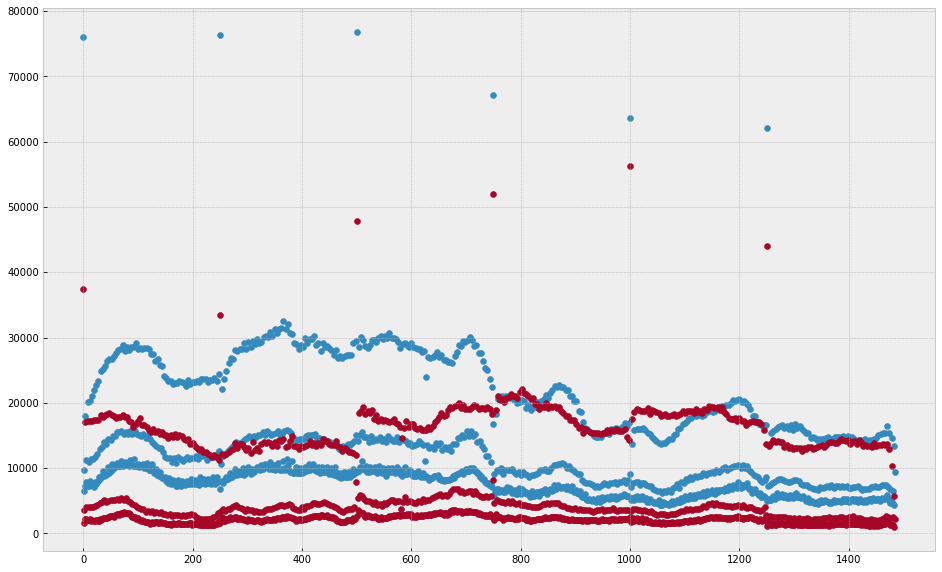

In [10]:
import matplotlib.pyplot as plt
import re

pattern = re.compile('pkt_size=([0-9]*)')

plt.clf()
plt.figure(figsize=(16, 10))

size1 = []
with open('visdrone/videos/vis_172_qp_30.txt', 'r') as f:
    for size in pattern.findall(f.read()):
        size1.append(int(size))

size2 = []
with open('visdrone/videos/vis_172_compressed_blackgen_saliency_score_qp_30_conv_1_bound_1.txt', 'r') as f:
    for size in pattern.findall(f.read()):
        size2.append(int(size))


plt.scatter(range(len(size1)), size1)
plt.scatter(range(len(size2)), size2)